Exploring Instacart Data

This project explores data from Instacart to give insights on users' order behaviors.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
try:
    orders = pd.read_csv('./datasets/instacart_orders.csv', sep=';')
except:
    orders = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/instacart_orders.csv', sep=';')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [3]:
try:
    products = pd.read_csv('./datasets/products.csv', sep=';')
except:
    products = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/products.csv', sep=';')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [4]:
try:
    aisles = pd.read_csv('./datasets/aisles.csv', sep=';')
except:
    aisles = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/aisles.csv', sep=';')
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [5]:
try:
    departments = pd.read_csv('./datasets/departments.csv', sep=';')
except:
    departments = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/departments.csv', sep=';')
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [6]:
try:
    order_products = pd.read_csv('./datasets/order_products.csv', sep=';')
except:
    order_products = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/order_products.csv', sep=';')
order_products.info(show_counts=True) # displays non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [7]:
# Check for duplicated orders
print(orders.duplicated().sum()) # Count the number of duplicates

15


In [8]:
# Check for all orders placed Wednesday at 2:00 AM
#print(orders.groupby('order_dow')['order_dow'].value_counts()) #- shows that 0 and 1 have the most orders
# which doesn't tell me if 0 is Sunday or Monday, but according to circuit.com (https://getcircuit.com/route-planner/blog/best-times-to-drive-for-instacart),
# Sunday is busiest followed by Monday.
# I will assume that the week starts on Sunday (Wednesday is 3). 
# I will also assume 0 is 12am (2am is therefore 2).
display(orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]) # Filtered to Wednesday at 2AM

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [9]:
# Remove duplicate orders
orders = orders.drop_duplicates() # Removes duplicate rows

In [10]:
# Double check for duplicate rows
print(orders.duplicated().sum()) # Count the number of duplicates

0


In [11]:
# Double check for duplicate order IDs only
print(orders['order_id'].duplicated().sum()) # Counts the duplicates for 'order_id' column

0


### `products` data frame

In [12]:
# Check for fully duplicate rows
print(products.duplicated().sum()) # Count the number of duplicated rows

0


In [13]:
# Check for just duplicate product IDs
print(products['product_id'].duplicated().sum()) # Counts the duplicates for 'product_id' column

0


In [14]:
# Check for just duplicate product names (convert names to lowercase to compare better)
print(products['product_name'].str.lower().duplicated().sum()) # Counts the duplicates for 'product_name' column

1361


In [15]:
# Check for duplicate product names that aren't missing
products_no_missing = products.dropna(subset=['product_name']) # drops the rows with missing product names
print(products_no_missing['product_name'].str.lower().duplicated().sum()) # counts the duplicate product names without missing

104


### `departments` data frame

In [16]:
print(departments.duplicated().sum()) # checks for duplicated rows

0


In [17]:
print(departments['department'].str.lower().duplicated().sum()) # counts the duplicate departments

0


### `aisles` data frame

In [18]:
print(aisles.duplicated().sum()) # checks for duplicated rows

0


In [19]:
print(aisles['aisle'].str.lower().duplicated().sum()) # counts the duplicate departments

0


### `order_products` data frame

In [20]:
# Check for fullly duplicate rows
print(order_products.duplicated().sum()) # checks for duplicated rows

0


In [21]:
# Double check for any other tricky duplicates
print(order_products[['order_id', 'product_id']].duplicated().sum())

0


## Find and remove missing values


### `products` data frame

In [22]:
# Are all of the missing product names associated with aisle ID 100?
# Check the length of the series returned by the condition to see
# if it is the same as the count of the missing values from the 'product_name' column
print(len(products[(products['product_name'].isnull()) & (products['aisle_id'] == 100)]) == 
      products['product_name'].isna().sum())

True


In [23]:
# Are all of the missing product names associated with department ID 21?
print(len(products[(products['product_name'].isnull()) & (products['department_id'] == 21)]) == 
      products['product_name'].isna().sum())

True


In [24]:
# What is this ailse and department?
# prints the value of the cell under 'aisle' where 'aisle_id' is 100
print('Aisle:', aisles[aisles['aisle_id'] == 100]['aisle'].values[0])
# prints the value of the cell under 'department' where 'department_id' is 21
print('Department:', departments[departments['department_id'] == 21]['department'].values[0])

Aisle: missing
Department: missing


In [25]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')

### `orders` data frame

In [26]:
# Are there any missing values where it's not a customer's first order?
# Prints number of missing values where 'order_number' is not 1
print(orders[(orders['order_number'] != 1)]['days_since_prior_order'].isna().sum())

0


### `order_products` data frame

In [27]:
# What are the min and max values in this column?
# I'm not sure which column, so I'm assuming 'order_id'
print('Min:', order_products['order_id'].min(), '\nMax:', order_products['order_id'].max())

Min: 4 
Max: 3421079


In [28]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
# Take all the rows that have missing values in 'add_to_cart_order'
# and the unique order_ids from that row.
order_missing_atco = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
print(order_missing_atco)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [29]:
# Do all orders with missing values have more than 64 products?
# It looks like the highest is 4 products. Maybe I'm not understanding what it's asking.
grouped_orders = order_products[order_products['order_id'].isin(order_missing_atco)].groupby('order_id')['product_id'].count()

sorted_orders = grouped_orders.sort_values(ascending=False)

print(sorted_orders)
# print(order_products[order_products['add_to_cart_order'].isna()]['product_id'].value_counts(ascending=False))


order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
888470      65
1598369     65
747668      65
1677118     65
9310        65
Name: product_id, Length: 70, dtype: int64


In [30]:
# Replace missing values with 999 and convert column to integer type
# Replace missing values with 999 using fillna()
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)
# Check to see if converting 'add_to_cart_order' will lose information when converting
print(np.array_equal(order_products['add_to_cart_order'], 
                     order_products['add_to_cart_order'].astype('int')))
# Do the actual conversion / cast
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int')
# Make sure it worked
order_products.info(show_counts=True)

True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int32
 3   reordered          4545007 non-null  int64
dtypes: int32(1), int64(3)
memory usage: 121.4 MB


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [31]:
# check whether the min and max values are from 0 to 23
print((orders['order_hour_of_day'].min() >=0) & (orders['order_hour_of_day'].max() <=23))

True


In [32]:
# check whether the min and max values are from 0 to 6
print((orders['order_dow'].min() >=0) & (orders['order_dow'].max() <=6))
print(orders['order_dow'].unique())

True
[6 5 0 4 3 1 2]


### [A2] What time of day do people shop for groceries?

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_id, dtype: int64


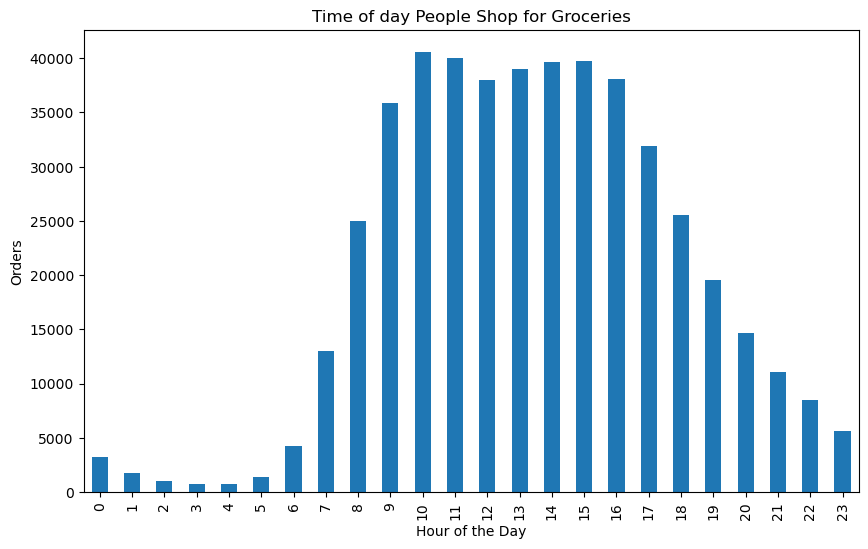

In [33]:
# It looks like most people shop for groceries between 7am and 9pm.
print(orders.groupby('order_hour_of_day')['order_id'].count())
orders.groupby('order_hour_of_day')['order_id'].count().plot(kind = 'bar', 
                                                                 figsize=(10,6),
                                                                xlabel='Hour of the Day',
                                                                ylabel='Orders',
                                                                title='Time of day People Shop for Groceries')
plt.show()

### [A3] What day of the week do people shop for groceries?

order_dow
Sunday       84090
Monday       82185
Tuesday      65833
Wednesday    60897
Thursday     59810
Friday       63488
Saturday     62649
Name: order_id, dtype: int64


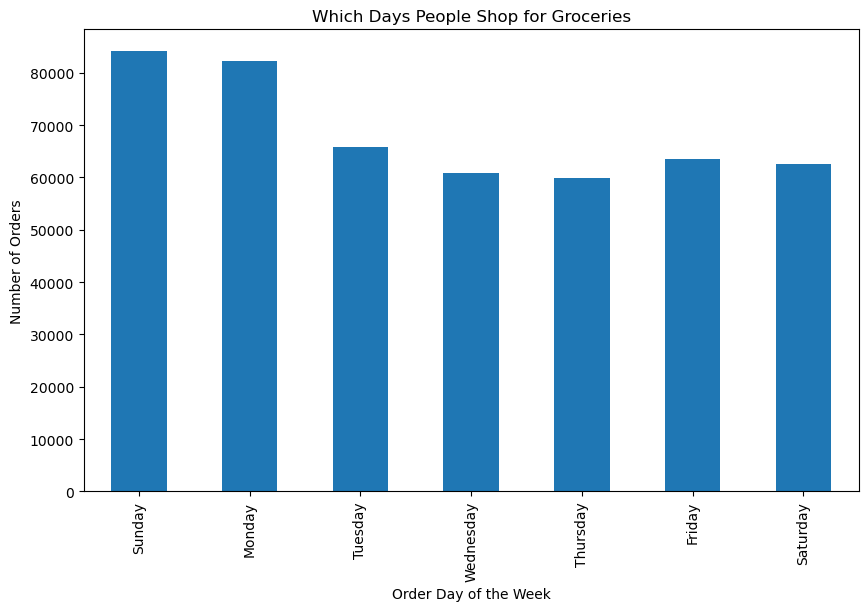

In [34]:
# Create a dictionary mapping numbers to days of the week
days = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
# Use groupby to count the orders per day of the week
orders_per_day = orders.groupby('order_dow')['order_id'].count()
# Rename the index using the days dictionary
orders_per_day.index = orders_per_day.index.map(days)
# Print it
print(orders_per_day)
# It looks like most people shop for groceries on Sunday and Monday.

# Plot the data
orders_per_day.plot(kind = 'bar',
                    figsize=(10,6),
                    xlabel='Order Day of the Week',
                    ylabel='Number of Orders',
                    title='Which Days People Shop for Groceries')

plt.show()

### [A4] How long do people wait until placing another order?

days_since_prior_order
0.0      9589
1.0     20179
2.0     27138
3.0     30224
4.0     31006
5.0     30096
6.0     33930
7.0     44577
8.0     25361
9.0     16753
10.0    13309
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6587
17.0     5498
18.0     4971
19.0     4939
20.0     5302
21.0     6448
22.0     4514
23.0     3337
24.0     3015
25.0     2711
26.0     2640
27.0     2986
28.0     3745
29.0     2673
30.0    51337
Name: user_id, dtype: int64


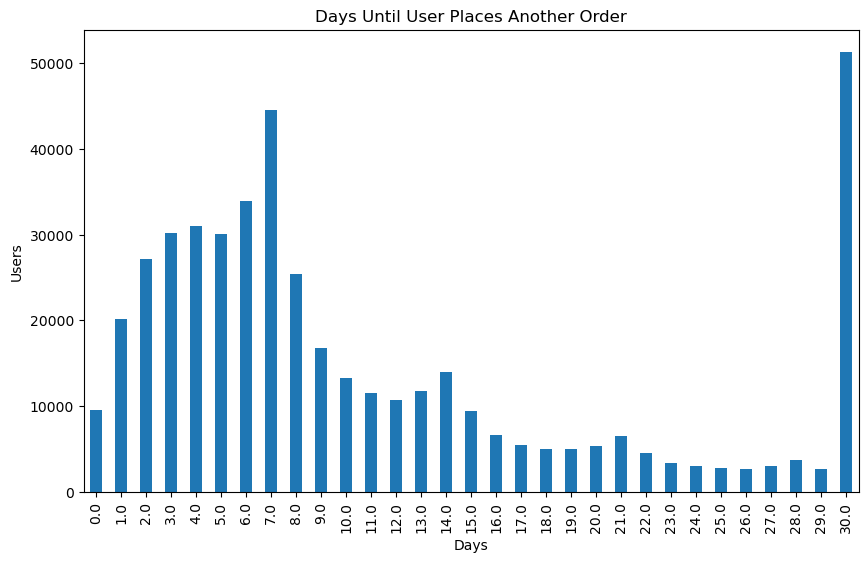

In [35]:
# It looks like most people order within two weeks.
print(orders.groupby('days_since_prior_order')['user_id'].count())
orders.groupby('days_since_prior_order')['user_id'].count().plot(kind = 'bar', 
                                                                 figsize=(10,6),
                                                                xlabel='Days',
                                                                ylabel='Users',
                                                                title='Days Until User Places Another Order')
plt.show()

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [36]:
# Get the data for Wednesday and Saturday
wednesday = orders[orders['order_dow'] == 3]['order_hour_of_day']
saturday = orders[orders['order_dow'] == 6]['order_hour_of_day']

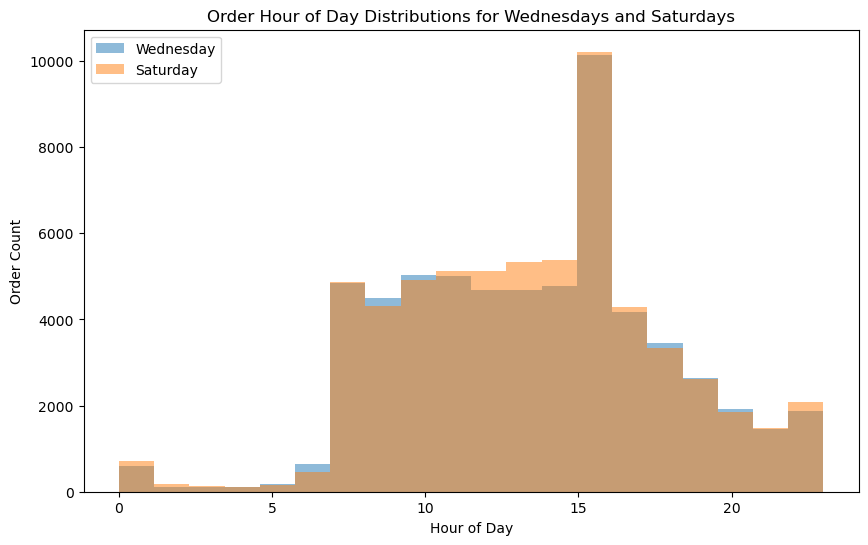

In [37]:
# Create the histogram
plt.figure(figsize=(10,6))
plt.hist(wednesday, bins=24, alpha=0.5, label='Wednesday')
plt.hist(saturday, bins=24, alpha=0.5, label='Saturday')
# Set Labels and Legend
plt.xlabel('Hour of Day')
plt.ylabel('Order Count')
plt.title('Order Hour of Day Distributions for Wednesdays and Saturdays')
plt.legend(loc='upper left')
# Show the histogram
plt.show()

The difference is minimal. It seems like the distributions do not differ much.

Saturdays have more orders and they're distributed in the late mornings and early afternoons

### [B2] What's the distribution for the number of orders per customer?

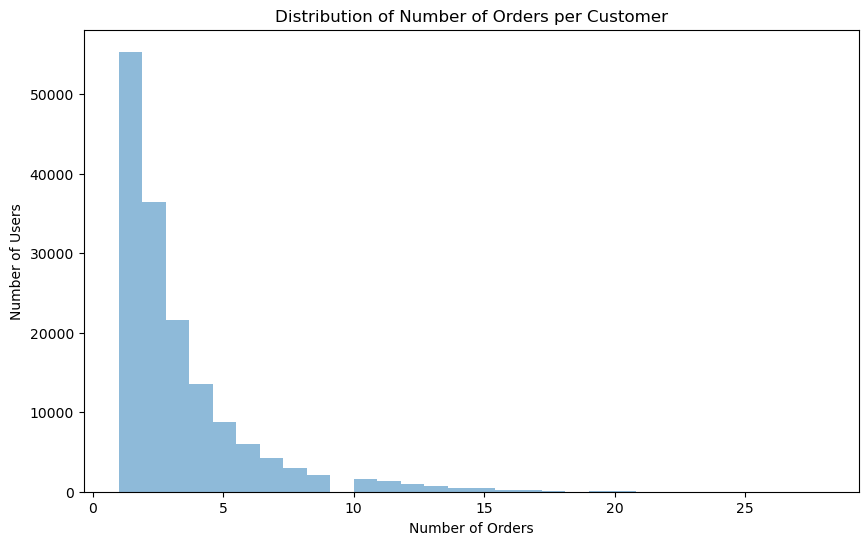

In [38]:
# Count the order numbers and group them by user id to find the number of orders per customer
orders_per_user = orders.groupby('user_id')['order_number'].count()
plt.figure(figsize=(10,6))
plt.hist(orders_per_user, bins=30, alpha=0.5)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of Orders per Customer')
plt.show()

### [B3] What are the top 20 popular products (display their id and name)?

In [39]:
# Merge the datasets on the 'product_id'
merged = pd.merge(order_products, products, on='product_id')

In [40]:
# Count the number of orders for each product
product_counts = merged.groupby(['product_id', 'product_name']).size()

In [41]:
# Print products based on counts sorted in descending order
print(product_counts.sort_values(ascending=False).head(20))

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
dtype: int64


# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [42]:
# Find the number of items ordered per order using .count() and group them by order id
items_per_order = order_products.groupby('order_id')['product_id'].count()

In [43]:
print('Median number of items per order:', items_per_order.median())

Median number of items per order: 8.0


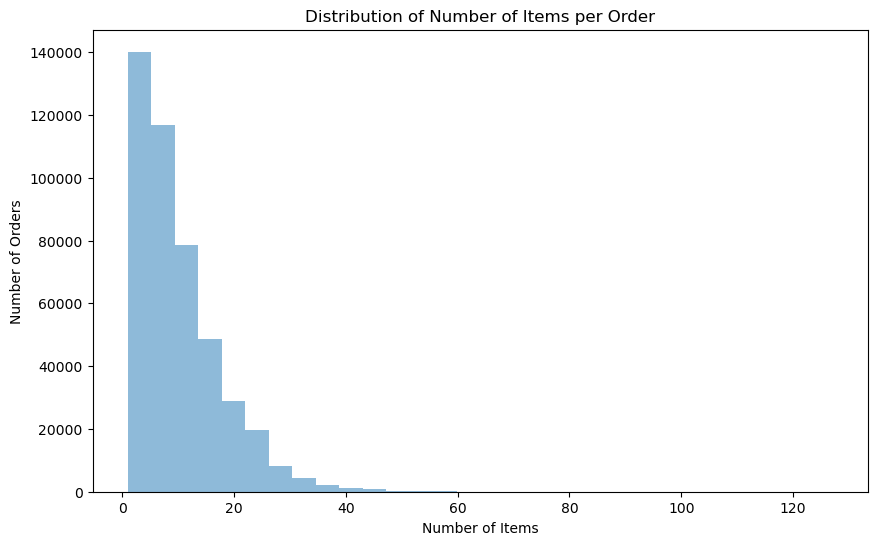

In [44]:
plt.figure(figsize=(10,6))
plt.hist(items_per_order, bins=30, alpha=0.5)
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.title('Distribution of Number of Items per Order')
plt.show()

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [45]:
# Filter for only reordered products
reordered_products = order_products[order_products['reordered'] == 1]
# Count the number of times each product was reordered
reorder_counts = reordered_products['product_id'].value_counts()
# Get the Product IDs of the top 20 reordered products
top_reordered_product_ids = reorder_counts.head(20).index
# Get their names
top_reordered_products = products[products['product_id'].isin(top_reordered_product_ids)]

In [46]:
print(top_reordered_products[['product_id', 'product_name']])

       product_id              product_name
5875         5876             Organic Lemon
8276         8277  Apple Honeycrisp Organic
13175       13176    Bag of Organic Bananas
16796       16797              Strawberries
21136       21137      Organic Strawberries
21902       21903      Organic Baby Spinach
22934       22935      Organic Yellow Onion
24851       24852                    Banana
24963       24964            Organic Garlic
26208       26209                     Limes
27844       27845        Organic Whole Milk
27965       27966       Organic Raspberries
28203       28204        Organic Fuji Apple
39274       39275       Organic Blueberries
45006       45007          Organic Zucchini
47208       47209      Organic Hass Avocado
47625       47626               Large Lemon
47765       47766           Organic Avocado
49234       49235       Organic Half & Half
49682       49683            Cucumber Kirby


### [C3] For each product, what proportion of its orders are reorders?

In [47]:
# Count the total number of orders for each product
total_orders = order_products['product_id'].value_counts()
# Filter for reordered products - dependent on a previous cell

# Calculate the proportion of reorders
reorder_proportion = reorder_counts / total_orders
# Convert to DataFrame
reorder_proportion_df = reorder_proportion.reset_index()
reorder_proportion_df.columns = ['product_id', 'reorder_proportion']
# Merge with products DataFrame
product_reorder_proportions = pd.merge(reorder_proportion_df, products, on='product_id')
# Print the product ids, names, and reorder proportions
print(product_reorder_proportions[['product_name', 'reorder_proportion']])

                                            product_name  reorder_proportion
0                             Chocolate Sandwich Cookies            0.564286
1                                       All-Seasons Salt                 NaN
2                   Robust Golden Unsweetened Oolong Tea            0.738095
3      Smart Ones Classic Favorites Mini Rigatoni Wit...            0.510204
4                         Pure Coconut Water With Orange            0.500000
...                                                  ...                 ...
45568                      HIGH PERFORMANCE ENERGY DRINK            0.800000
45569                      ORIGINAL PANCAKE & WAFFLE MIX            0.430556
45570    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR            0.416667
45571                             SPRING WATER BODY WASH            0.440000
45572                            BURRITO- STEAK & CHEESE            0.333333

[45573 rows x 2 columns]


### [C4] For each customer, what proportion of their products ordered are reorders?

In [48]:
# Merge 'orders' and 'order_products' on 'order_id'
merged = pd.merge(orders, order_products, on='order_id')
# Count the total number of orders for each customer
total_orders = merged.groupby('user_id').size()
# Filter for reordered products
reordered_products = merged[merged['reordered'] == 1]
# Count the number of reorders for each customer
reorder_counts = reordered_products.groupby('user_id').size()
# Calculate the proportion of reorders
reorder_proportion = reorder_counts / total_orders
# Print the user ids and reorder proportions
print(reorder_proportion)

user_id
2         0.038462
4              NaN
5         0.666667
6              NaN
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Length: 149626, dtype: float64


### [C5] What are the top 20 items that people put in their carts first? 

In [49]:
# Filter for products that were added to the cart first
first_added_products = order_products[order_products['add_to_cart_order'] == 1]
# Count the number of times each product was the first item added to the cart
first_added_counts = first_added_products['product_id'].value_counts()
# Get the product ids of the top 20 products that were added to the cart first
top_first_added_product_ids = first_added_counts.head(20).index
# Get the names of the top 20 products that were added to the cart first
top_first_added_products = products[products['product_id'].isin(top_first_added_product_ids)]
# Add the frequencies to the DataFrame
top_first_added_products = top_first_added_products.set_index('product_id')
top_first_added_products['frequency'] = first_added_counts
# Print the product ids and names
print(top_first_added_products.reset_index()[['product_id', 'product_name', 'frequency']])

    product_id                 product_name  frequency
0          196                         Soda       1733
1         5785  Organic Reduced Fat 2% Milk       1310
2        12341                Hass Avocados       1340
3        13176       Bag of Organic Bananas      11026
4        16797                 Strawberries       2308
5        19660                 Spring Water       2336
6        21137         Organic Strawberries       3946
7        21903         Organic Baby Spinach       3336
8        24852                       Banana      15562
9        26209                        Limes       1370
10       27086                  Half & Half       1309
11       27845           Organic Whole Milk       4363
12       27966          Organic Raspberries       2024
13       38689     Organic Reduced Fat Milk       1397
14       43352                  Raspberries       1246
15       44632   Sparkling Water Grapefruit       1914
16       47209         Organic Hass Avocado       3390
17       4